In [1]:
import numpy as np

from scipy.optimize import curve_fit
from matplotlib import pyplot as plt


In [2]:
def exp_fit(xs, ys): # assume positive a
    clean_xs = xs[ys > 0]
    clean_ys = ys[ys > 0]
    p = np.polyfit(clean_xs, np.log(clean_ys), 1)
    print(p)
    b, log_a = p
    a = np.exp(log_a)
    
    def func(x, a, b):
        return a*np.exp(b*x)
    res, _ = curve_fit(func, xs, ys, p0=[a,b])
    cf_a, cf_b = res
    return cf_a, cf_b


[-3.04381922  4.7310784 ]


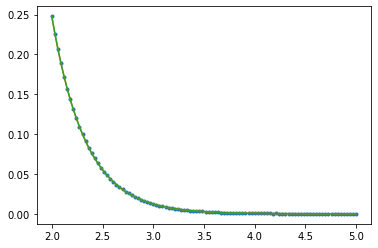

In [3]:
xs = np.linspace(2,5, 100)
a = 100
b = -3
ys = a*np.exp(b*xs) + np.random.randn(100)*1e-4
plt.plot(xs, ys, '.')

a, b = exp_fit(xs, ys)

plt.plot(xs, a*np.exp(b*xs))
plt.plot(xs, ys)